In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount="True")


Mounted at /content/drive


In [2]:
import os
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD

# Task 1: Data Structuring

In [4]:
#An empty DataFrame to store data
data = {'article_id': [], 'text': [], 'category': []}

# Iterate through files in BBC_articles folder
folder_path = '/content/drive/MyDrive/Dataset/BBC_articles'
for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        # Extract article ID and category from filename
        article_id, category = filename.split('_')
        category = category.split('.')[0]  # remove file extension
        # Read text content of the file
        with open(os.path.join(folder_path, filename), 'r', encoding='utf-8') as file:
            text = file.read()
        # Append data to DataFrame
        data['article_id'].append(article_id)
        data['text'].append(text)
        data['category'].append(category)

In [5]:
# Create DataFrame from the collected data
df = pd.DataFrame(data)

# Save DataFrame to csv
df.to_csv('bbc_articles.csv', index=False)

In [6]:
df.head()

,article_id,text,category
0,2031,uk young top euro earnings league british chil...,business
1,299,bafta to hand out movie honours movie stars fr...,entertainment
2,194,french suitor holds lse meeting european stock...,business
3,757,hotspot users gain free net calls people using...,tech
4,245,swiss cement firm in buying spree swiss cement...,business


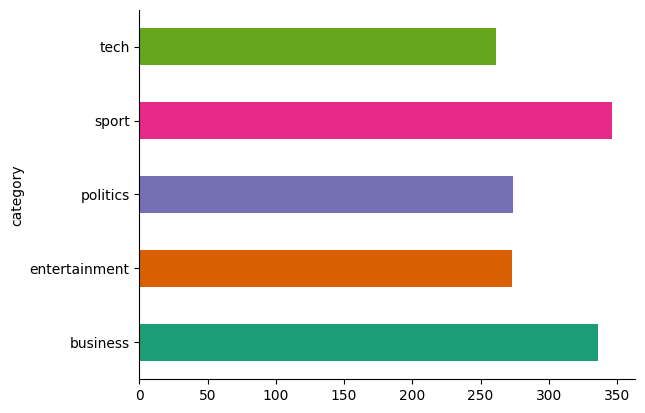

In [7]:
# @title category
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Task 2: Data Preprocessing for Model Training

In [8]:
# Reading the bbc_articles.csv file into a DataFrame
df = pd.read_csv('bbc_articles.csv')

# Tokenization, stopword removal, lemmatization
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [9]:
def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Tokenization and lowercasing
    tokens = [token for token in tokens if token.isalpha()]  # Remove punctuation
    tokens = [token for token in tokens if token not in stop_words]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(token) for token in tokens]  # Lemmatization
    return ' '.join(tokens)
df['clean_text'] = df['text'].apply(preprocess_text)#cleaning the text


In [10]:
# Vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['clean_text'])

In [15]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['category'], test_size=0.2, random_state=42)

In [34]:
# Truncated SVD for dimensionality reduction
svd = TruncatedSVD(n_components=1000)  # Reduce to 500 dimensions
X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.transform(X_test)

In [35]:
# Convert train and test sets to DataFrame
X_train_df = pd.DataFrame(X_train_svd, columns=[f'component_{i}' for i in range(X_train_svd.shape[1])])
X_test_df = pd.DataFrame(X_test_svd, columns=[f'component_{i}' for i in range(X_test_svd.shape[1])])

In [36]:
# Concatenate features with labels
train_df = pd.concat([X_train_df, y_train.reset_index(drop=True)], axis=1)
test_df = pd.concat([X_test_df, y_test.reset_index(drop=True)], axis=1)

In [37]:
# Convert train and test sets to DataFrame
X_train_df = pd.DataFrame(X_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
X_test_df = pd.DataFrame(X_test.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [38]:
# Save the final dataset to csv
train_df.to_csv('vectorized_dataset_train.csv', index=False)
test_df.to_csv('vectorized_dataset_test.csv', index=False)

In [39]:
print("Train Data")
train_df.head()

Train Data


,component_0,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,...,component_991,component_992,component_993,component_994,component_995,component_996,component_997,component_998,component_999,category
0,0.085102,-0.008608,-0.029333,-0.003203,0.086897,0.018140,-0.002031,-0.008145,0.010668,0.026075,...,-0.001614,-0.006809,-0.005111,-0.002809,0.003954,0.019557,-0.000084,-0.016558,-0.002942,business
1,0.196094,0.126623,0.073624,0.021550,-0.061665,-0.000449,0.005195,0.011293,-0.054952,0.000794,...,-0.001941,0.014364,-0.002621,0.000052,0.017662,0.004517,0.009744,0.028060,-0.009240,politics
2,0.110750,-0.034376,-0.087623,-0.017540,0.072611,-0.074769,-0.025855,-0.073913,0.002735,0.032008,...,0.023999,-0.005392,-0.002597,0.009400,-0.019196,0.005951,-0.013310,0.001893,-0.007358,business
3,0.156228,0.041844,0.049633,0.038709,-0.046366,-0.012871,0.007556,0.004096,-0.015250,0.008301,...,-0.007615,-0.004644,-0.003971,0.000543,0.000041,0.010548,-0.006623,0.002317,-0.008256,politics
4,0.181236,-0.040900,-0.156050,-0.059592,-0.034185,-0.020049,-0.048426,-0.010576,0.028731,0.020147,...,0.019086,0.001104,0.002850,-0.001783,0.017510,0.036465,0.017270,0.048636,0.003826,tech


In [40]:
print("Test Data")
test_df.head()

Test Data


,component_0,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,...,component_991,component_992,component_993,component_994,component_995,component_996,component_997,component_998,component_999,category
0,0.137852,-0.005373,-0.041457,-0.030784,-0.067113,-0.072899,-0.009555,-0.041379,-0.011161,-0.002787,...,-0.011777,0.001649,-0.002995,-0.001606,-0.017842,-0.004144,-0.017775,-0.000876,0.007276,tech
1,0.155552,0.074172,-0.023157,-0.016851,0.073114,-0.002647,-0.007775,0.005394,0.007259,-0.003613,...,0.001752,-0.004412,-0.007029,-0.008016,0.003526,0.002198,-0.004948,-0.002840,0.003346,business
2,0.097427,-0.058369,0.030047,0.130764,-0.025373,0.003283,-0.039557,0.007539,-0.144338,0.060167,...,0.003528,0.004006,0.019085,-0.003229,-0.012796,-0.006968,-0.001282,-0.004170,0.003819,sport
3,0.191553,-0.027254,-0.130840,-0.041139,0.000016,-0.148922,-0.065294,-0.069780,0.015008,0.028534,...,-0.004043,0.033708,0.004755,-0.003609,-0.004984,-0.008042,0.004288,0.009648,-0.012053,tech
4,0.302052,0.292229,0.104740,-0.020201,-0.052341,0.036354,0.020123,-0.023957,-0.030043,0.002621,...,0.001409,-0.007628,0.001360,-0.004713,0.007430,0.006959,-0.009131,-0.001976,-0.001866,politics
